In [131]:
#importing different python packages to perform
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
import numpy as np
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [91]:
#training a dataset
df = pd.read_csv("monet.csv")

In [92]:
print(df)

        PRICE  HEIGHT  WIDTH  SIGNED  PICTURE  HOUSE 
0    3.993780    21.3   25.6       1        1       1
1    8.800000    31.9   25.6       1        2       2
2    0.131694     6.9   15.9       0        3       3
3    2.037500    25.7   32.0       1        4       2
4    1.487500    25.7   32.0       1        4       2
..        ...     ...    ...     ...      ...     ...
425  5.282500    25.6   39.4       1      375       1
426  9.352500    25.9   39.6       1      375       2
427  8.252500    25.6   39.6       1      375       1
428  3.410000    25.6   39.4       1      386       2
429  1.542500    25.7   32.0       1      387       1

[430 rows x 6 columns]


In [93]:
df.head(6)

,PRICE,HEIGHT,WIDTH,SIGNED,PICTURE,HOUSE
0,3.993780,21.3,25.6,1,1,1
1,8.800000,31.9,25.6,1,2,2
2,0.131694,6.9,15.9,0,3,3
3,2.037500,25.7,32.0,1,4,2
4,1.487500,25.7,32.0,1,4,2
5,1.870000,25.6,31.9,1,4,1


In [94]:
df.shape

(430, 6)

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PRICE    430 non-null    float64
 1   HEIGHT   430 non-null    float64
 2   WIDTH    430 non-null    float64
 3   SIGNED   430 non-null    int64  
 4   PICTURE  430 non-null    int64  
 5   HOUSE    430 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 20.3 KB


In [96]:
df.notnull()

,PRICE,HEIGHT,WIDTH,SIGNED,PICTURE,HOUSE
0,True,True,True,True,True,True
1,True,True,True,True,True,True
2,True,True,True,True,True,True
3,True,True,True,True,True,True
4,True,True,True,True,True,True
...,...,...,...,...,...,...
425,True,True,True,True,True,True
426,True,True,True,True,True,True
427,True,True,True,True,True,True
428,True,True,True,True,True,True


In [97]:
df.isnull()

,PRICE,HEIGHT,WIDTH,SIGNED,PICTURE,HOUSE
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
425,False,False,False,False,False,False
426,False,False,False,False,False,False
427,False,False,False,False,False,False
428,False,False,False,False,False,False


In [98]:
df.fillna(0)

,PRICE,HEIGHT,WIDTH,SIGNED,PICTURE,HOUSE
0,3.993780,21.3,25.6,1,1,1
1,8.800000,31.9,25.6,1,2,2
2,0.131694,6.9,15.9,0,3,3
3,2.037500,25.7,32.0,1,4,2
4,1.487500,25.7,32.0,1,4,2
...,...,...,...,...,...,...
425,5.282500,25.6,39.4,1,375,1
426,9.352500,25.9,39.6,1,375,2
427,8.252500,25.6,39.6,1,375,1
428,3.410000,25.6,39.4,1,386,2


array([[<AxesSubplot:title={'center':'PRICE'}>,
        <AxesSubplot:title={'center':'HEIGHT'}>],
       [<AxesSubplot:title={'center':'WIDTH'}>,
        <AxesSubplot:title={'center':'SIGNED'}>],
       [<AxesSubplot:title={'center':'PICTURE'}>,
        <AxesSubplot:title={'center':'HOUSE '}>]], dtype=object)

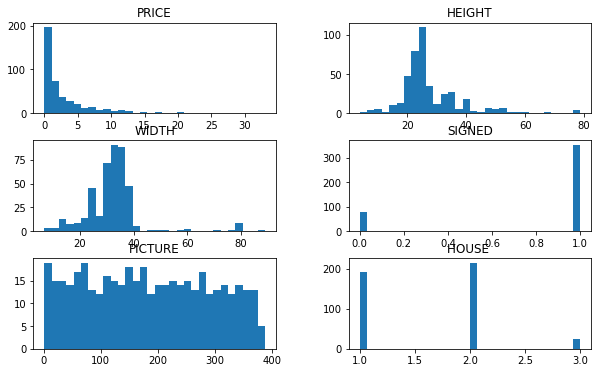

In [99]:
df.hist(grid=False,
       figsize=(10, 6),
       bins=30)

In [100]:
df.agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
PRICE,2.840902,10.598796
HEIGHT,1.832789,6.131083
WIDTH,2.055290,8.952752
SIGNED,-1.679947,0.826041
PICTURE,0.070325,-1.167413
HOUSE,0.374641,-0.689935


In [101]:
# Python log transform
df.insert(len(df.columns), 'C_log',
         np.log(df['HEIGHT']))

In [102]:
# Log transformation of negatively (left) skewed data in Python
df.insert(len(df.columns), 'D_log',
         np.log(max(df.iloc[:, 2] + 1) - df.iloc[:, 2]))

In [103]:
df

,PRICE,HEIGHT,WIDTH,SIGNED,PICTURE,HOUSE,C_log,D_log
0,3.993780,21.3,25.6,1,1,1,3.058707,4.165114
1,8.800000,31.9,25.6,1,2,2,3.462606,4.165114
2,0.131694,6.9,15.9,0,3,3,1.931521,4.305416
3,2.037500,25.7,32.0,1,4,2,3.246491,4.060443
4,1.487500,25.7,32.0,1,4,2,3.246491,4.060443
...,...,...,...,...,...,...,...,...
425,5.282500,25.6,39.4,1,375,1,3.242592,3.923952
426,9.352500,25.9,39.6,1,375,2,3.254243,3.919991
427,8.252500,25.6,39.6,1,375,1,3.242592,3.919991
428,3.410000,25.6,39.4,1,386,2,3.242592,3.923952


In [104]:
from scipy.stats import skew
print("RESERVED:",skew(max(df.iloc[:, 2] + 1) - df.iloc[:, 2]))
print("NEGATIVE:",skew(df.iloc[:, 2]))

RESERVED: -2.0481130945582953
NEGATIVE: 2.048113094558297


<AxesSubplot:>

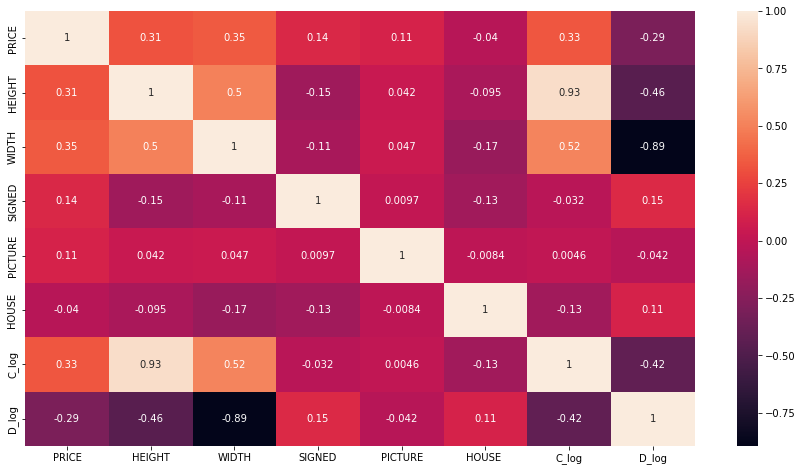

In [105]:
# Finding correlation between the variables
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap(df.corr(), annot=True)

In [106]:
df['SIZE'] = df['HEIGHT']*df['WIDTH']

In [107]:
df

,PRICE,HEIGHT,WIDTH,SIGNED,PICTURE,HOUSE,C_log,D_log,SIZE
0,3.993780,21.3,25.6,1,1,1,3.058707,4.165114,545.28
1,8.800000,31.9,25.6,1,2,2,3.462606,4.165114,816.64
2,0.131694,6.9,15.9,0,3,3,1.931521,4.305416,109.71
3,2.037500,25.7,32.0,1,4,2,3.246491,4.060443,822.40
4,1.487500,25.7,32.0,1,4,2,3.246491,4.060443,822.40
...,...,...,...,...,...,...,...,...,...
425,5.282500,25.6,39.4,1,375,1,3.242592,3.923952,1008.64
426,9.352500,25.9,39.6,1,375,2,3.254243,3.919991,1025.64
427,8.252500,25.6,39.6,1,375,1,3.242592,3.919991,1013.76
428,3.410000,25.6,39.4,1,386,2,3.242592,3.923952,1008.64


In [108]:
for column in df.columns:
  if df.dtypes[column] != np.object:
    print(column ,' : ' , skew(df[column], axis=0, bias=True, nan_policy='omit'))

PRICE  :  2.8309820163618893
HEIGHT  :  1.8263892242940685
WIDTH  :  2.048113094558297
SIGNED  :  -1.674080612166068
PICTURE  :  0.07007980158027305
HOUSE   :  0.3733324102363447
C_log  :  -0.6357819431970992
D_log  :  -6.46647381553117
SIZE  :  3.8831941413460154


C:\Users\sande\AppData\Local\Temp/ipykernel_33968/2536822990.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if df.dtypes[column] != np.object:


<AxesSubplot:xlabel='SIZE', ylabel='C_log'>

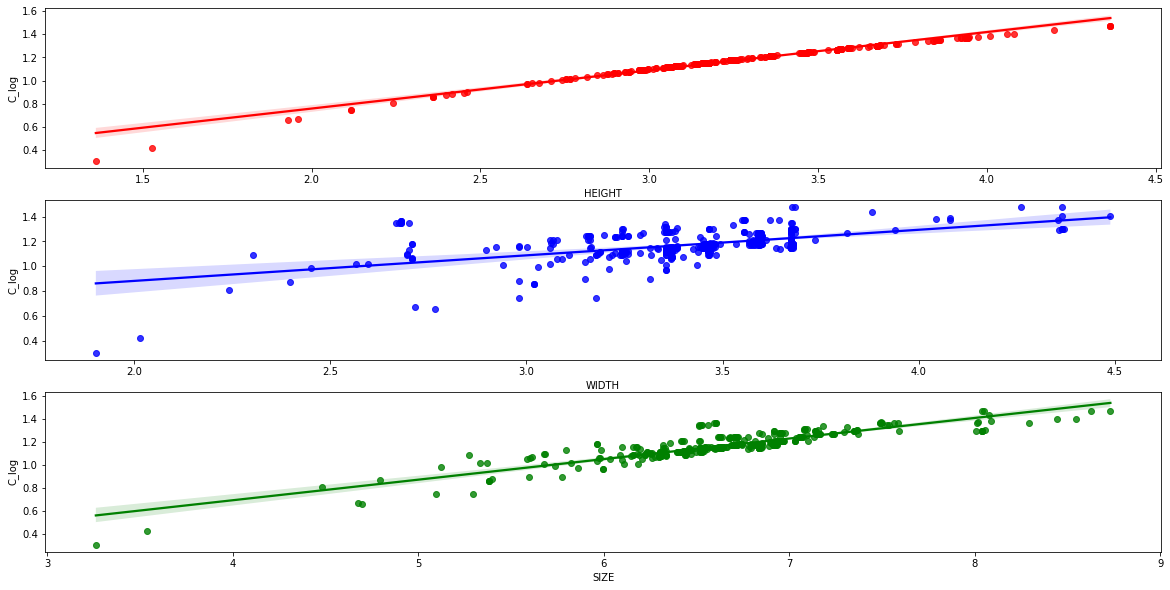

In [130]:
# We can check this more clearly by using scatter plot
# Before plotting we will convert numerical features into their respective log normal values
fig, (ax1,ax2,ax3) = plt.subplots(nrows=3, ncols=1, figsize=(20,10))
sns.regplot(x='HEIGHT',y='C_log',data=df.apply(np.log), scatter=True, fit_reg=True, ax=ax1, color='red')
sns.regplot(x='WIDTH',y='C_log',data=df.apply(np.log), scatter=True, fit_reg=True, ax=ax2, color='blue')
sns.regplot(x='SIZE',y='C_log',data=df.apply(np.log), scatter=True, fit_reg=True, ax=ax3, color='green')

In [110]:
# Simple Linear Regression model 1

X = df[['SIZE']].values
y= df['PRICE'].values

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [112]:
M1 = linear_model.LinearRegression()
M1.fit(X_train, y_train)

LinearRegression()

In [113]:
y_pred = M1.predict(X_test)

In [114]:
price_df = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred})
price_df

,Actual Price,Predicted Price
0,0.908000,3.182809
1,0.886000,1.789030
2,0.762774,3.146428
3,0.352000,1.942730
4,3.742500,3.006416
...,...,...
81,1.390620,2.573611
82,0.288500,2.250453
83,1.487500,2.755056
84,7.539658,3.001823


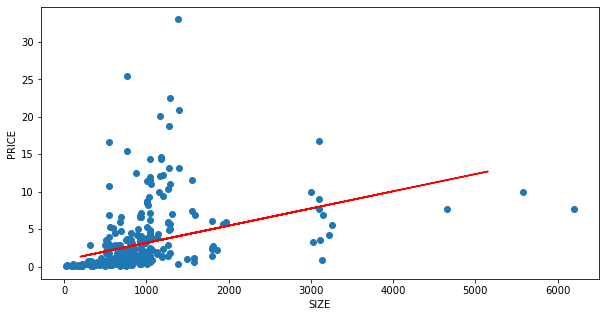

In [115]:
fig, ax = plt.subplots(figsize=(10,5))
plt.scatter(X_train, y_train)
plt.plot(X_test, y_pred, color = 'red')
plt.xlabel("SIZE")
plt.ylabel("PRICE")
plt.show()

In [116]:
from sklearn import metrics
import numpy as np
print('Mean Absolute error',metrics.mean_absolute_error(y_test,y_pred))
print('Mean squared error',metrics.mean_squared_error(y_test,y_pred))
print('root Mean squared error',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute error 2.6855486941004543
Mean squared error 16.35922009540488
root Mean squared error 4.044653272581579


In [117]:
# Simple Linear Regression model 2
X = df[['HEIGHT']].values
y= df['WIDTH'].values

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [119]:
M2 = linear_model.LinearRegression()
M2.fit(X_train, y_train)

LinearRegression()

In [120]:
y_pred = M2.predict(X_test)

In [121]:
price_df = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred})
price_df

,Actual Price,Predicted Price
0,39.4,30.861881
1,28.7,25.611402
2,36.5,31.586085
3,24.8,27.829277
4,36.4,30.861881
...,...,...
81,31.5,29.956626
82,28.7,28.779795
83,32.0,30.907144
84,39.4,29.956626


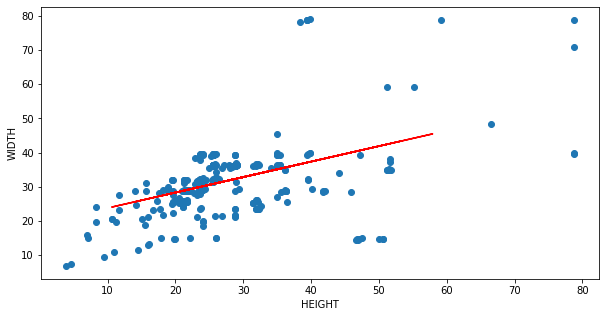

In [122]:
fig, ax = plt.subplots(figsize=(10,5))
plt.scatter(X_train, y_train)
plt.plot(X_test, y_pred, color = 'red')
plt.xlabel("HEIGHT")
plt.ylabel("WIDTH")
plt.show()

In [123]:
from sklearn import metrics
import numpy as np
print('Mean Absolute error',metrics.mean_absolute_error(y_test,y_pred))
print('Mean squared error',metrics.mean_squared_error(y_test,y_pred))
print('root Mean squared error',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute error 5.561003826288447
Mean squared error 89.90651765571262
root Mean squared error 9.481904748293594


In [124]:
# Multiple Linear Regression model 3
X = df[['WIDTH', 'HEIGHT','SIZE','SIGNED','PICTURE', 'HOUSE ']].values
y= df['PRICE'].values

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [126]:
M3 = linear_model.LinearRegression()
M3.fit(X_train, y_train)

LinearRegression()

In [127]:
y_pred = M3.predict(X_test)

In [128]:
price_df = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred})
price_df

,Actual Price,Predicted Price
0,0.908000,3.860860
1,0.886000,1.730270
2,0.762774,3.224028
3,0.352000,1.283868
4,3.742500,3.490797
...,...,...
81,1.390620,2.727410
82,0.288500,0.496383
83,1.487500,2.834219
84,7.539658,4.588408


In [132]:
from sklearn import metrics
import numpy as np
print('Mean Absolute error',metrics.mean_absolute_error(y_test,y_pred))
print('root Mean squared error',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute error 2.5506852722047513
root Mean squared error 3.918428997954071
